# Random Forest

~a.k.a 묻지마모델~

랜덤포레스트는 분류 또는 회귀를 위한 앙상블 학습 방법이다. <br>다수의 의사결정나무를 생성하여 훈련을 시킨 뒤 각각의 나무들이 내놓는 예측값의 가장 많은 수(분류) 또는 평균 예측치(회귀)를 결과로 반환한다.

(출처: https://en.wikipedia.org/wiki/Random_forest)

The Elements of Statistical Learning에 따르면, <b>"의사결정나무는 부정확성이란 이름으로 그들이 이상적인 예측 모델이 되는 것을 방지하는 경향이 있다"고 한다.
    
$\rightarrow$ 다른 말로 의사결정나무는 모델을 만들 때 사용한 데이터에 대해서는 분류(또는 예측)를 잘 할 수 있지만 새로운 데이터에 대해서는 분류(또는 예측)가 잘 안 될 수도 있다는 뜻이다.

<span style="color:blue">Step 1. Create a bootstrap dataset</span>

<b>Original Dataset</b>
<img src="img/RF_01_class.PNG">

Original dataset과 같은 크기의 Bootstrap dataset을 만들기 위해서 <b>임의로(Ramdomly) Original dataset에서 복원추출</b>을 할 것이다.

** Allow duplicate entries in the bootstrapped dataset.

<b>Bootstrapped Dataset</b>
<img src="img/RF_02_class.PNG">

<span style="color:blue">Step 2. Create a decision tree using the bootstrapped dataset, but only use a random subset of variables (or columns) at each step.</span>

Tree를 분할(split) 할 때 네 개의 독립변수(independent variable)를 모두 이용하지 않고 임의로 두 개만 선택을 한다.

"좋은 혈액순환 여부"와 "동맥경화 여부"를 선택되었고, "동맥경화 여부"가 분할에 가장 적합한 변수였다고 하면 해당 변수로 Tree를 분할 한다.

그러면 그 다음 또 다시 네 개의 독립변수 중 두 개를 다시 임의로 골라서 분할에 적합한 변수를 선택한다.

이 과정을 반복되면서 다양한 모양의 Tree를 키우게 된다.

최종적으로 Tree들을 만들게 되면 Classification을 할 데이터를 각 Tree에 넣어 결과를 받아본다.<br> 
그리고 결과들을 모아서 Entry에 대한 분류를 한다. (Result Aggregating)

#### Result Aggregating

<span style="color : blue">생성된 다수의 Tree들로 Result Aggregating하는 방법에는 <b>Hard voting</b>과 <b>Soft voting</b> 두 가지가 있다. </span>

<br>

1) Hard voting
    - Hard voting은 직접 투표방식으로 단순히 "어느 클래스가 더 많은 투표를 받았는가"로 분류를 진행한다. 따라서 가장 많은 Tree가 분류한 결과(Class)로 분류가 된다.
<br>
2) Soft voting

    - Soft voting은 간접 투표방식으로 "각 모델이 선택한 결과(클래스)에 가중치를 부여"하여 분류를 진행한다. 가중치를 부여하는 방식에는 두 가지 종류가 있다.

* Training Accuracy of individual models

<img src="img/RF_13_class.PNG">

$$ {\sum^{n}_{j=1}{(TrainAcc_j)*(I\hat{y}_j = 0)}\over{\sum^{n}_{j=1}(TrainAcc_j)} }= {{0.91 + 0.77 + 0.95 + 0.82} \over {0.80 + 0.75 + 0.88 + 0.91 + 0.77 + 0.65 + 0.95 + 0.82 + 0.78 + 0.83}} = 0.424$$

$$ {\sum^{n}_{j=1}{(TrainAcc_j)*(I\hat{y}_j = 1)}\over{\sum^{n}_{j=1}(TrainAcc_j)} }=  0.576$$

* Predicted Probability for each class

<img src="img/RF_14_class.PNG">

$$ {1 \over 10}{ \sum^{10}_{j=1}{P(y=1)} = {{0.90 + 0.92 + 0.87 + 0.34 + 0.41 +0.84 + 0.14 + 0.32 + 0.98 + 0.57} \over 10} = 0.629 } $$
$$ {1 \over 10}{ \sum^{10}_{j=1}{P(y=0)} = 0.371 } $$

<br>

위의 경우에는 Hard voting과 Soft voting이 둘 다 클래스를 1로 분류하고 있다. 

Soft voting 방식이 Hard voting보다 성능이 더 높지만 훈련 시간이 더 오래걸린다.

### Ensemble

이렇게 <span style="color:blue">여러 Base 모델들의 예측을 다수결 법칙 또는 평균을 이용해 통합하여 예측 정확성을 향상시키는 방법을 <b>Ensemble</b>이라고 한다.</span>
<br><br>

<span style="color:red">다만, 다음의 조건을 만족해야 유의미한 효과를 가질 수 있다.</span>

1) Base 모델들이 독립관계에 있어야 한다.
- 따라서 <u>각기 다른 알고리즘</u>이 <u>각기 다른 데이터</u>를 가지고 학습을 해야 한다. <br>이렇게 하면 매우 다른 종류의 오차를 만들 가능성이 높기 때문에 앙상블 모델의 정확도를 향상시키게 된다.

2) Base 모델들이 무작위 예측을 수행하는 모델보다 성능이 좋아야 한다.
- 예를 들어 Two-Class 예측에서 정답을 맞출 확률이 0.5 이상이어야 한다.


<br>
일반적으로 Ensemble의 결과는 원본 데이터셋으로 하나의 모델을 훈련시킬 때와 비교해서 Bias는 비슷하지만 Varience가 줄어든다.

#### What is Out-Of-Bag(OOB) dataset?

Bootstrap dataset에 들어가지 못한 데이터(entries)를 의미한다.

Bootstrap 방법으로 만드는 Dataset은 Original Dataset과 같은 크기를 만든다.<br>
따라서 크기를 m이라고 두면, 무작위로 하나의 샘플을 추출할 때 한 번도 선택되지 않을 확률은 $1 - {1 \over m}$이다.<br>
이를 m번 반복했음에도 한 번도 선택되지 않을 확률은 $(1 - {1 \over m})^m$이다.

이 과정이 수 없이 반복된다고 했을 때, ...
$$\lim_{m \rightarrow \infty}{(1 - {1 \over m})^m} = e^{-1} = 0.368$$
...이다.

때문에 OOB Dataset은 Original Dataset의 약 37% 정도를 가지게 된다.

이 Dataset은 Tree를 구성하는데 쓰이지 않았기 때문에 OOB dataset으로 Random Forest의 성능을 평가할 수 있다.

OOB 데이터 중 잘못 분류된 비율을 <b>Out-Of-Bag Error</b>라고 한다.

다시 정리하자면,<br>
방금 전에는 한 step마다 독립변수 두 개를 임의로 추출하여 그 중 하나를 선택하는 것으로 결정하였지만 OOB Error를 구할 수 있게 됨으로써 세 개를 임의로 추출하는 방법과 비교하여 어느 것이 더 정확한 Random Forest를 만들 수 있는지 알 수 있게 되었다.

#### How to measure Generalization Error? (일반화 오차)

알고리즘이 새로운 데이터에 대한 결과값을 얼마나 정확하게 예측할 수 있는지에 대한 정도를 나타낸다.

개별 모델(tree)는 overfitting이 될 수 있으나 Random Forest에서 충분히 많은 Tree를 사용하면 Strong Law of Large Numbers(대수의 법칙)에 의해 과적합되지 않고 그 에러는 Limiting Value에 수렴된다.

Random Forest의 Generalization Error의 상한선에 대한 식은 아래와 같다.

$$ Generalization Error \leq {\bar{p} {(1 - s^2)} \over {s^2} }$$
$\bar{p}$ : Decision Tree(Base Model) 사이의 평균 상관관계<br>
$s$ : 맞게 예측한 Tree와 잘못 예측한 Tree 수 차이의 평균

* 개별 Tree의 정확도가 높을수록 $s$가 증가한다.
* Bagging과 Random Subspace 기법으로 모델간의 독립된 관계를 최대화하기 때문에 모델간 상관관계 $p$를 감소시킨다.

### How to measure Feature Importance? (중요변수 선택)

Random Forest는 개별 변수가 통계적으로 얼마나 유의한지에 대한 정보를 제공하지 않는다. 하지만 간접적인 방법을 통해서 Feature Importance를 제공하고 있다.

Feature Importance를 측정하는 방법은 두 가지가 있다.


1) Mean Decrease Impurity (= Gini Importance)

2) Permutation Importance

<br>

Scikit-Learn에서는 첫 번째 방법으로 제공하고 있지만 reliable하지 않다는 이슈가 있다.

따라서 정확한 측정을 위해서 Permutation Importance를 권장한다.

#### Mean Decrease Impurity (= Gini Importance)

Random Forest를 구성하는 각 Tree에서 특정 feature를 기준으로 split하는 지점에서 decrease of impurity의 총 합을 계산한 후, 이 모든 tree의 값들의 평균을 낸 것이 Mean Decrease Impurity(= Gini Importance)이다. 

그 feature가 모델이 분류를 잘하는데 중요하게 작용할수록 이 값은 커진다.

Scikit-Learn에서 사용하는 방법이다.

#### Mean Decrease Accuracy (= Permutation Importance)

<b><span style="color:blue"> 1) 원래 데이터 집합에서 OOB Error를 구함 </span></b>

<img src="img/RF_15_class.PNG">

Out-Of-Bag Error = $r_i$ (i = 1,2,3)
<br><br>

<b><span style="color:blue"> 2) 특정 변수의 값을 임의로 뒤섞은 데이터 집합에 대해서 OOB Error를 구함 </span></b>

<img src="img/RF_16_class.PNG">

OOB ERROR (Permuted) = $e_i$ (i = 1,2,3)
<br><br>

<b><span style="color:blue"> 3) 개별 변수의 중요도는 2단계와 1단계 OOB Error 차이의 평균과 분산을 고려하여 결정 </span></b>

Permuted된 변수의 dataset으로 구한 OOB ERROR과 원본 dataset으로 구한 OOB ERROR 간의 차이(distance)를 구한다.<br>
$$d_i = e_i - r_i \hspace{0.5cm} (i=1,2,3)$$

그리고 각 tree에서 계산된 $d$의 평균을 구한다.<br>
$$\bar{d} = {1 \over t}{\sum^{t}_{i=1}d_i}$$

그 뒤 Scaling을 위한 분산 $s$를 구한다. (위의 경우에는 OOB Score로 계산하였기 때문에 Scaling이 필요없음)<br>
$$S^{2}_{d} = {1 \over {t-1}}\sum^{t}_{i=1}{(d_i - \bar{d})^2}$$

따라서 계산한 결과는 다음과 같다.

* Permute Feature $X_1$의 경우

$$\bar{d} = {{(0.5 - 0.12) + (0.45 - 0.45) + (0.4 - 0.2)} \over 3} \approx 0.17$$

$$S^{2}_{d} = {1 \over {3-1}}\sum^{3}_{i=1}(d_i - \bar{d})^2 = {{0.11 + 0.08 + 0.05} \over {2}} \approx 0.12$$

* Permute Feature $X_2$의 경우

$$\bar{d} = {{(0.82 - 0.12) + (0.65 - 0.45) + (0.7 - 0.2)} \over 3 } \approx 0.47$$

$$S^{2}_{d} = {1 \over {3-1}}\sum^{3}_{i=1}(d_i - \bar{d})^2 = {{0.42 + 0.23 + 0.28} \over {2}} \approx 0.47$$


<b><span style="color:blue"> 4) 변수 중요도 </span></b>

$$v = {\bar{d} \over s_d}$$

* Feature $X_1$의 중요도 = ${0.17 \over \sqrt{0.12}} \approx 0.49$

* Feature $X_2$의 중요도 = ${0.47 \over \sqrt{0.47}} \approx 0.69$

#### Mean Decrease Impurity vs. Mean Decrease Accuracy

Tree based models provides a different measure of feature importances based on the mean decrease in impurity (MDI, the splitting criterion). This gives importance to features that may not be predictive on unseen data. The permutation feature importance avoids this issue, since it can be applied to unseen data. 

$\rightarrow$ Tree 기반의 모델들은 Impurity(불순도)가 평균적으로 얼마나 감소하는가를 기준으로 각 feature(변수)들의 중요도를 다르게 측정한다. 하지만 이 방법은 unseen data(학습에 사용되지 않은 새로운 데이터)에 대해서는, 각 변수의 중요도를 계산할 때 unseen data를 얼마나 잘 예측할지를 반영을 할 수 없다. 이와 달리 permutation importance는 unseen data에도 적용이 될 수 있기 때문에 이런 문제를 피할 수 있다.

<br><br>

Furthermore, impurity-based feature importance for trees are strongly biased and favor high cardinality features (typically numerical features). Permutation-based feature importances do not exhibit such a bias. Additionally, the permutation feature importance may use an arbitrary metric on the tree’s predictions.

$\rightarrow$ 더 나아가 Tree 모델들을 위한 impurity-based feature importance는 굉장히 편향(bias)되어있으며 high cardinality features (특히 numerical features)를 선호합니다. 반면 permutation-based feature importance는 이런 편향(bias)을 보이지 않습니다. 추가적으로, permutation feature importance는 Tree 모델의 예측에서 <b><span style="color:red">????arbitrary metric?????</span></b>을 사용합니다.
<br><br>

The impurity-based feature importance of random forests suffers from being computed on statistics derived from the training dataset: the importances can be high even for features that are not predictive of the target variable, as long as the model has the capacity to use them to overfit.

$\rightarrow$ Random Forest의 impurity-based feature importancesms impurity-based feature importance를 구할 때, 훈련 데이터셋에서 나오는 통계를 계산하는데에 어려움을 겪습니다. 실제론 타겟 변수를 예측하는데 중요한 변수가 아니더라도 모델이 해당 변수를 사용하여 Over-fitting 되었을 경우에는 그 변수가 중요하게 여길 수 있습니다. <br><br>

impurity-based importances are biased towards high cardinality features;

$\rightarrow$ Impurity-based importance는 high cardinality features에 편향되어 있습니다.

impurity-based importances are computed on training set statistics and therefore do not reflect the ability of feature to be useful to make predictions that generalize to the test set (when the model has enough capacity).

$\rightarrow$ High cardinality features ::: Categorical Data인데 unique한 데이터가 굉장히 많은 경우. 예를 들어 지역구 feature인데 그 지역구 종류가 9000개인 경우

$\rightarrow$ ??

* High cardinality feature 란?

k를 특정 column에 있는 데이터의 유일한 값(unique value)들의 수라고 했을 때, high cardinality는 유일한 값 매우 많은 것을 의미한다.

예를 들어서 수백개의 우편번호가 있는 column은 high cardinality feature라고 할 수 있다. 

출처 :: https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159


<b>Decision Tree</b>에서도 Feature Importance를 측정할 수 있지만 모든 Feature를 사용하지는 않는 반면, <br>
<b>Random Forest</b>는 Random Subspace 기법에 따라 무작위로 Feature를 사용하기 때문에 거의 모든 Feature에 대해서 Importance를 측정할 수 있다.

# Missing data and sample clustering

Random Forests consider 2 types of missing data...

1) Missing data in the original dataset used to create the random forest<br>
$\rightarrow$ 랜덤포레스트를 만들기 위한 Original Dataset의 결측치

2) Missing data in a new sample that you want to categorize<br>
$\rightarrow$ 예측하려는 Entry(훈련에 쓰지 않은 new data)의 변수 중 결측치

## #1 Missing data in the original dataset used to create the random forest

<b>Filled-in Missing Values</b>
<img src="img/RF_03_class.PNG">
물론 initial guess는 틀릴 수 있다.

이제 이 가정에 대한 평가를 진행할 것이다.

먼저 결측치가 보완된 dataset으로 Random Forest를 만든다.<br>
그리고 모든 데이터를 생성한 모든 Tree에 넣어 결과를 받아본다.

일단 <b>첫 번째 Tree</b>에 넣어본 결과....

<img src="img/RF_04_class.PNG">

데이터가 다음과 같이 분류되었다.<br>
특히 initial guess가 들어간 Entry 4는 Entry 3와 같은 Class로 분류되었다.

즉, 두 데이터(entry)는 비슷하다는 뜻이다.

이러한 결과들을 Proximity Matrix에 계속해서 기록할 것이다.<br>
Proximity Matrix는 아래와 같이 생겼다.

<img src="img/RF_05_class.PNG">
Entry 3과 4가 같은 클래스로 분류된 것을 표현하였다.

<b> 두 번째 Tree </b>로 분류한 결과 Entry 2,3,4가 같은 클래스로 분류되었다면, Proximity Matrix는 아래와 같이 업데이트 된다.

<img src="img/RF_06_class.PNG">

<b>총 10개의 Tree를 생성했다고 하였을 때</b> 최종적인 Proximity Matrix는 다음과 같다.

<img src="img/RF_07_class.PNG">

이제 Proximity Matrix를 가지고 결측치에 대한 더 나은 guess를 할 수 있다.

<b>Categorical Data</b>
<img src="img/RF_08_class.PNG">

<b>동맥경화 여부</b>에서 Proximity Matrix의 Value를 Weight로 사용하여<br> Entry 4의 결측치가 "Yes"와 "No" 중 어디에 가까운지 계산할 것이다.

"Yes"는 Entry 1,2,3 중 두 번째만이 가지고 있다.<br>
따라서, <b>The frequency of "Yes" = $1 \over 3$</b>

"No"는 Entry 1,2,3 중 첫 번째와 세 번째가 가지고 있다.<br>
따라서, <b>The frequency of "No" = $2 \over 3$</b>

이 때 Entry 4에서 Entry 2가 유사한 정도는 <span style="color:green">0.1</span>이다.<br>
따라서, <b>The weight for "Yes" = ${1 \over 3} * {0.1 \over {0.1 + 0.1 + 0.8}} = 0.03$</b>

한편 Entry 4에서 Entry 1과 3이 유사한 정도는 <span style="color:red">0.1</span>과 <span style="color:red">0.8</span>이다.<br>
따라서, <b>The weight for "No" = ${2 \over 3} * {{0.1+0.8 }\over {0.1 + 0.1 + 0.8}} = 0.6$</b>

$\rightarrow$ 결과적으로 "No"가 훨씬 더 높은 weighted frequency를 가지고 있기 때문에 Entry 4의 동맥경화 여부 결측치는 No로 guess를 한다.

<b>Numerical Data</b>
<img src="img/RF_09_class.PNG">

<b>체중</b>에서 Proximity Matrix의 Value를 Weight로 사용하여<br> Entry 4의 결측치를 Entry 1,2,3의 Weighted Average로 guess할 것이다.

따라서, <b>The weighted average for Entry 4 = $(125 * 0.1) + (180 * 0.1) + (210 * 0.8) = 198.5$</b>

다음과 같이 업데이트 된 결측치를 갖게 된다.
<img src="img/RF_10_class.PNG">


따라서 Random Forest 모델을 만들고 데이터를 input하여 결측치에 대한 guess를 계속해서 업데이트 한다.

이 작업을 결측치 value가 <u>converge(i.e. no longer change each time we recalculate)</u>할 때까지 계속한다.

##  #2 Missing data in a new sample that you want to categorize

이미 Random Forest 모델을 만든 상황에서 새로운 데이터를 넣어 예측하려고 한다.
<img src="img/RF_11_class.PNG">
그런데 위와 같이 "동맥경화 여부"에 결측치가 있기 때문에 모델을 적용하면 에러가 발생한다. 따라서 이 부분을 해결해줄 필요가 있다.

우선 아래와 같이 두 가지 종류의 데이터를 만든다.
<img src="img/RF_12_class.PNG">
그 다음 \#1에서 사용한 것과 같은 iterative method를 사용한다.

Random Forest를 구성하는 Tree들이<br>
"동맥경화 여부"가 Yes일 때 "심장질환 여부"를 Yes로 대답한 경우가 3번<br>
"동맥경화 여부"가 No일 때 "심장질환 여부"를 No로 대답한 경우가 1번<br>이라고 할 때,

"동맥경화 여부"가 Yes일 때 더 많이 맞추었기 때문에 해당 값으로 대체(imputation)한다.


## 참고노트

1. <b>B</b>ootstrapping the data plus using the <b>agg</b>regate to make a decision is called <b>"Bagging"</b> <br>
한편 Bagging과 달리 중복을 허용하지 않고 샘플링하는 방식은 Pasting이라고 한다.

2. 비율화한 Proximity Matrix의 값들을 1에서 빼면 Distance Matrix로 바꿀 수 있다. 그리고 이를 시각화하면 Heatmap을 그리게 된다.

https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

출처:::

https://www.youtube.com/watch?v=nyxTdL_4Q-Q

## Apply Algorithm to Data

In [138]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [105]:
df = pd.read_csv('./data/heart.csv')

In [106]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [107]:
df.index

RangeIndex(start=0, stop=303, step=1)

In [108]:
df.sort_values('target', inplace=True)
df.reset_index(inplace = True, drop = True)

In [109]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
1,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
2,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
3,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
4,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0


In [110]:
print(
    df[df.target == 0].index[-1],
    df[df.target == 1].index[-1]
)

137 302


In [111]:
#train_idx_0 = random.sample(range(1, 138), 138//2)
#test_idx_0 = [x for x in range(1, 138) if x in train_idx_0]

#train_idx_1 = random.sample(range(138, 303), (303-138)//2)
#test_idx_1 = [x for x in range(138, 303) if x in train_idx_1]

#train_idx = train_idx_0 + train_idx_1
#test_idx = test_idx_0 + test_idx_1

#del train_idx_0, test_idx_0, train_idx_1, test_idx_1

In [112]:
#scaler = MinMaxScaler()
#df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [113]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
1,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
2,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
3,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
4,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0


In [121]:
model_rf = RandomForestClassifier(n_estimators = 10000, max_depth=5, random_state=42, n_jobs=-1, oob_score = True)

In [122]:
model_rf.fit(df[df.columns[:-1]].iloc[train_idx],
            df[df.columns[-1]].iloc[train_idx])
model_rf.oob_score_

0.8278145695364238

In [123]:
model_prediction = model_rf.predict(df[df.columns[:-1]].iloc[test_idx])

In [124]:
print(accuracy_score(df[df.columns[-1]].iloc[test_idx], model_prediction))
print(recall_score(df[df.columns[-1]].iloc[test_idx], model_prediction))
print(precision_score(df[df.columns[-1]].iloc[test_idx], model_prediction))

0.9735099337748344
0.9878048780487805
0.9642857142857143


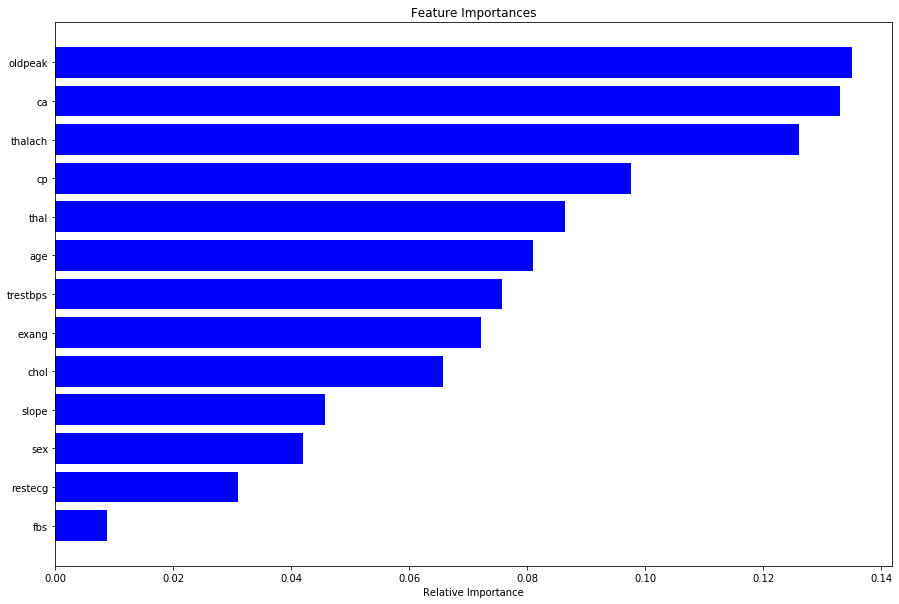

In [125]:
features = df.columns[:-1]
importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [126]:
perm = PermutationImportance(model_rf).fit(df[df.columns[:-1]].iloc[train_idx], 
                                           df[df.columns[-1]].iloc[train_idx])

In [127]:
eli5.show_weights(perm,feature_names = list(features))

Weight,Feature
0.0768 ± 0.0361,ca
0.0477 ± 0.0130,cp
0.0358 ± 0.0106,oldpeak
0.0331 ± 0.0205,thalach
0.0252 ± 0.0176,trestbps
0.0238 ± 0.0135,restecg
0.0212 ± 0.0130,chol
0.0185 ± 0.0228,exang
0.0146 ± 0.0053,age
0.0132 ± 0.0118,sex


In [128]:
pd.DataFrame(
    confusion_matrix(df[df.columns[-1]].iloc[test_idx], model_prediction),
    columns=['Predicted_NO','Predicted_YES'],
    index=['Actual_NO','Actual_YES'])

,Predicted_NO,Predicted_YES
Actual_NO,66,3
Actual_YES,1,81


## Calculate Feature Importance with random value feature

In [129]:
pseudo_df = df.copy()
pseudo_df['random_f'] = random.sample(range(0,303),303)
pseudo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
random_f    303 non-null int64
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [130]:
pseudo_df = pseudo_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'random_f', 'target']]

In [131]:
# scaler = MinMaxScaler()
# pseudo_df = pd.DataFrame(scaler.fit_transform(pseudo_df), columns=pseudo_df.columns)

In [132]:
pseudo_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,random_f,target
0,57,0,1,130,236,0,0,174,0,0.0,1,1,2,221,0
1,44,1,0,110,197,0,0,177,0,0.0,2,1,2,217,0
2,60,1,0,125,258,0,0,141,1,2.8,1,1,3,58,0
3,58,1,0,150,270,0,0,111,1,0.8,2,0,3,163,0
4,68,1,2,180,274,1,0,150,1,1.6,1,0,3,70,0


In [133]:
pseudo_model_rf = RandomForestClassifier(n_estimators = 12000, max_depth=4, random_state=42, n_jobs=-1, oob_score = True)

pseudo_model_rf.fit(pseudo_df[pseudo_df.columns[:-1]].iloc[train_idx],
            pseudo_df[pseudo_df.columns[-1]].iloc[train_idx])
print('OOB SCORE :::',pseudo_model_rf.oob_score_)

pseudo_model_prediction = pseudo_model_rf.predict(pseudo_df[pseudo_df.columns[:-1]].iloc[test_idx])

print(accuracy_score(pseudo_df[pseudo_df.columns[-1]].iloc[test_idx], pseudo_model_prediction))
print(recall_score(pseudo_df[pseudo_df.columns[-1]].iloc[test_idx], pseudo_model_prediction))
print(precision_score(pseudo_df[pseudo_df.columns[-1]].iloc[test_idx], pseudo_model_prediction))

OOB SCORE ::: 0.8211920529801324
0.9271523178807947
0.9512195121951219
0.9176470588235294


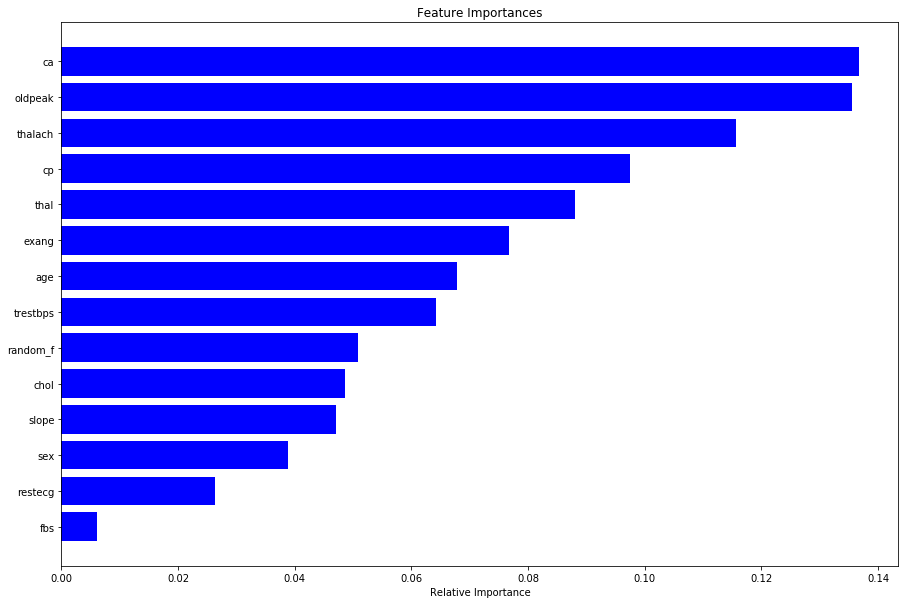

In [134]:
features = pseudo_df.columns[:-1]
importances = pseudo_model_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [135]:
pseudo_perm = PermutationImportance(pseudo_model_rf).fit(pseudo_df[pseudo_df.columns[:-1]].iloc[train_idx], 
                                           pseudo_df[pseudo_df.columns[-1]].iloc[train_idx])

In [136]:
eli5.show_weights(pseudo_perm,feature_names = list(features))

Weight,Feature
0.0331 ± 0.0393,ca
0.0265 ± 0.0168,cp
0.0172 ± 0.0180,oldpeak
0.0119 ± 0.0154,thal
0.0119 ± 0.0053,random_f
0.0066 ± 0.0145,sex
0.0066 ± 0.0084,restecg
0.0053 ± 0.0099,chol
0.0040 ± 0.0159,thalach
0.0040 ± 0.0180,slope


In [137]:
pd.DataFrame(
    confusion_matrix(pseudo_df[pseudo_df.columns[-1]].iloc[test_idx], pseudo_model_prediction),
    columns=['Predicted_NO','Predicted_YES'],
    index=['Actual_NO','Actual_YES'])

,Predicted_NO,Predicted_YES
Actual_NO,62,7
Actual_YES,4,78


# Result (feature importances)

<img src="img/RF_18_class.PNG">

근데 Result를 보면... ㄴr는 가끔 눈물ㅇ1 흐른ㄷr....

뭐가 잘못된 것인가 8ㅁ8